<a href="https://colab.research.google.com/github/Mariam-Mohsen/CODSOFT/blob/main/movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("IMDb Movies India.csv",encoding='latin1')

In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Year'] = data['Year'].str.extract('(\d+)').astype(int)

In [ ]:
data['Duration']= data['Duration'].str.replace('min','').apply(pd.to_numeric)
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',',''))

In [ ]:
data['Duration'].fillna(data['Duration'].mean(),inplace=True)
data['Rating'].fillna(data['Rating'].mode().max(),inplace=True)
data['Votes'].fillna(data['Votes'].mean(),inplace=True)

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
data.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


In [ ]:
actor1_encoding_map = data.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = data.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = data.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = data.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = data.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

data['Actor 1'] = round(data['Actor 1'].map(actor1_encoding_map), 1)
data['Actor 2'] = round(data['Actor 2'].map(actor2_encoding_map), 1)
data['Actor 3'] = round(data['Actor 3'].map(actor3_encoding_map), 1)
data['Director'] = round(data['Director'].map(director_encoding_map), 1)
data['Genre'] = round(data['Genre'].map(genre_encoding_map), 1)

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,6.4,7.0,8,7.0,6.8,7.0,7.0
3,#Yaaram,2019,110,5.7,4.4,35,4.4,5.4,4.4,4.4
5,...Aur Pyaar Ho Gaya,1997,147,6.2,4.7,827,5.3,4.8,5.8,5.9
6,...Yahaan,2005,142,6.8,7.4,1086,7.4,5.4,6.9,6.5
8,?: A Question Mark,2012,82,5.5,5.6,326,5.6,5.6,5.9,5.6


In [ ]:
label = data['Rating']
features = data.drop(columns=['Rating','Name'], axis=1)

In [ ]:
correlation= features.corrwith(label).sort_values(ascending=False)
print("Correlation with Label (Rating):")
correlation

Correlation with Label (Rating):


Director    0.809482
Actor 3     0.776066
Actor 2     0.767801
Actor 1     0.750750
Genre       0.429604
Votes       0.142563
Duration    0.001839
Year       -0.204642
dtype: float64

# Model

In [ ]:
scaler = StandardScaler()
x=scaler.fit_transform(features)
y=label

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)
prediction

array([5.65959308, 1.54663294, 5.36404163, ..., 4.97976599, 6.12079615,
       6.70173672])

In [ ]:
mse = mean_squared_error(y_test, prediction)
mse

0.423914621398256

In [ ]:
r2_score(y_test, prediction)

0.7710727279750982

# Visualization

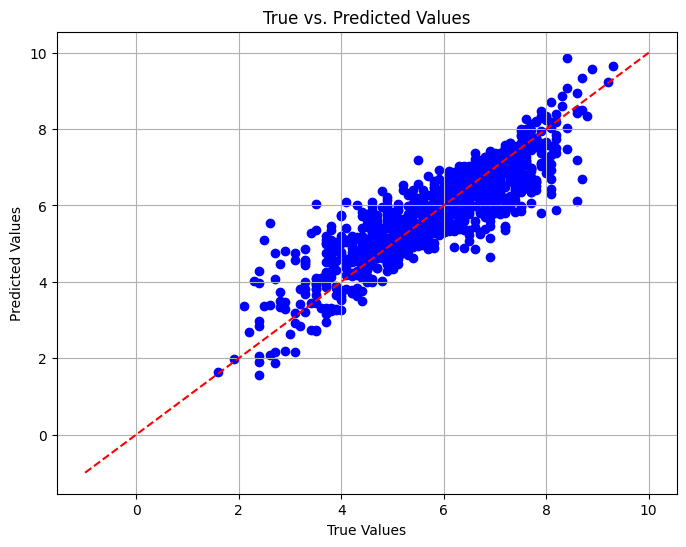

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, color='blue')
plt.plot([-1, 10], [-1, 10], linestyle='--', color='red')
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
